# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [2]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [3]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [4]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

In [0]:
# TODO - your code here!
survey_data= [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.DataFrame(survey_data)


In [10]:
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


zero = coke
one = pepsi

the mean above = sample mean 


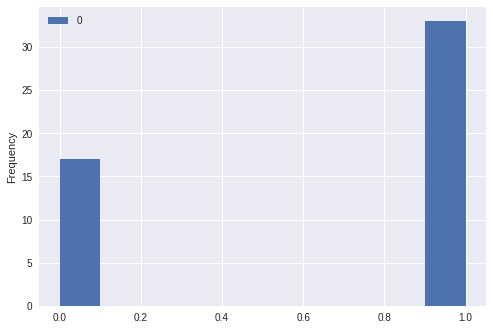

In [11]:
# histogram helps us see the overall distribution
# more 1s than 0s
df.plot.hist()

In [12]:
# Now with confidence
import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [0]:
scipy.stats.ttest_1samp??

In [0]:
# above tells us that we reject null hypothesys
#https://homepage.stat.uiowa.edu/~mbognar/applets/t.html <- use statistic and pvalue on two-tailed test

In [15]:
(df.mean() - 0.5) / (df.std()* len(survey_data)**(0.5))

0    0.047286
dtype: float64

In [0]:
# Science: Reproducibility...
import random

# creating more coke & pepsi data
def make_soda_data(n=50):
    # Fair version:
    # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
    
    # Unfair version:
    return pd.DataFrame(np.random.binomial(n=1, p=0.6, size=n))

In [19]:
sample_stderr = 0.478518 /np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5
#  We want to calculate --> tstat = 2.364321853156195


# our null hypothesis is not that is centered at zero
# it's centered at 0.5
# result would be more precise if we were doing a z-test
# but this is the kind of calculation that happens in t-statistics
# you divide the error by the difference
#stderr / (sample_mean -0.5) # In the right direction

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [20]:
make_soda_data(n=500).describe()

,0
count,500.00000
mean,0.63600
std,0.48163
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [21]:
# Running some hypothesis tests
t_statistics = []
p_values = []
n_experiments = 10000

for _ in range(n_experiments):
    df = make_soda_data(n=1000)
    ttest = scipy.stats.ttest_1samp(df, 0.5) # like a binomial dist with fair coin (0.5)
    t_statistics.append(ttest.statistic)
    p_values.append(ttest.pvalue)
    
pd.DataFrame(t_statistics).describe()


,0
count,10000.000000
mean,6.458355
std,1.061953
min,2.728307
25%,5.717342
50%,6.451744
75%,7.128173
max,11.199901


In [22]:
pd.DataFrame(p_values).describe()

,0
count,1.000000e+04
mean,6.379030e-06
std,1.185862e-04
min,1.642961e-27
25%,1.947456e-12
50%,1.720468e-10
75%,1.428232e-08
max,6.477751e-03


In [23]:
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [24]:
help(random.choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [25]:
random.choice([0, 1, 1]) #Unfair coins

1

In [26]:
# gives us the sum of 100 coin flips
np.random.binomial(100, .5) # n, p

55

In [27]:
np.random.binomial(1, 0.6)

0

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
col_names=[
'party',
'handicapped-infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-in-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa']

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                   header=None, names=col_names)
data = data.replace({'y': 1, 'n': 0, '?': 0.5})

In [29]:
data.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.443678,0.503448,0.594253,0.419540,0.504598,0.637931,0.565517,0.573563,0.501149,0.504598,0.368966,0.428736,0.509195,0.589655,0.432184,0.737931
std,0.490392,0.472138,0.485114,0.487597,0.491848,0.474522,0.488067,0.486324,0.487752,0.496510,0.470393,0.477104,0.485891,0.482418,0.479414,0.365960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,0.000000,0.500000,1.000000,0.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [31]:
cols = data.columns.tolist()
cols

['party',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

### Republicans

In [32]:
data_rep = data[data.party == 'republican']
data_rep.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.193452,0.505952,0.142857,0.979167,0.943452,0.892857,0.25000,0.175595,0.122024,0.556548,0.151786,0.842262,0.839286,0.961310,0.119048,0.636905
std,0.390476,0.470660,0.342336,0.126611,0.221762,0.305356,0.42384,0.359390,0.321379,0.493750,0.340653,0.337922,0.347452,0.164126,0.295870,0.446887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.50000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Democrats

In [33]:
data_dem = data[data.party == 'democrat']
data_dem.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.00000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.601124,0.501873,0.878277,0.067416,0.228464,0.477528,0.764045,0.823970,0.73970,0.471910,0.505618,0.168539,0.301498,0.355805,0.629213,0.801498
std,0.481889,0.473941,0.317379,0.235772,0.407005,0.491909,0.416460,0.376602,0.41882,0.496375,0.489520,0.351772,0.444174,0.469756,0.468128,0.287453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,1.000000,0.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Comparing Republicans VS Democrats

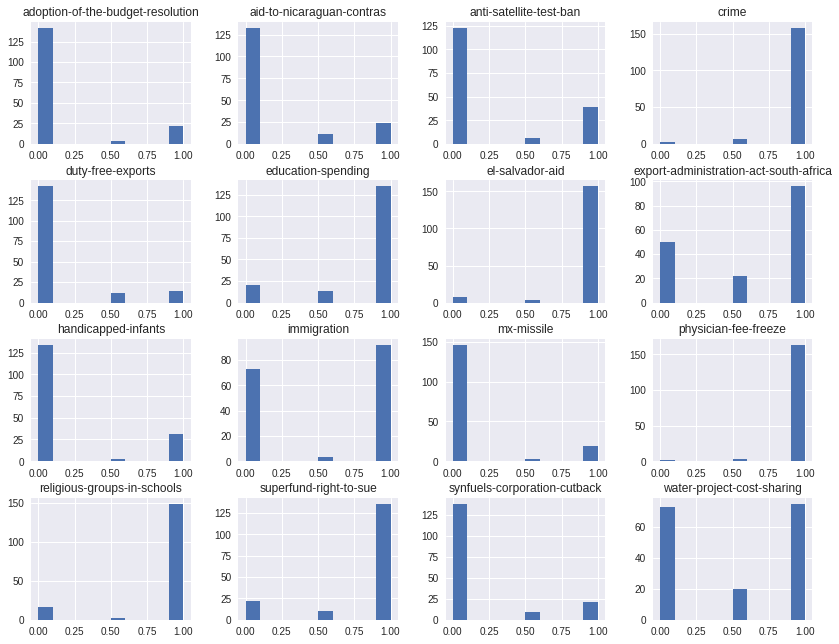

In [79]:
# Histogram - Republicans
data_rep.hist(figsize=(14,11));

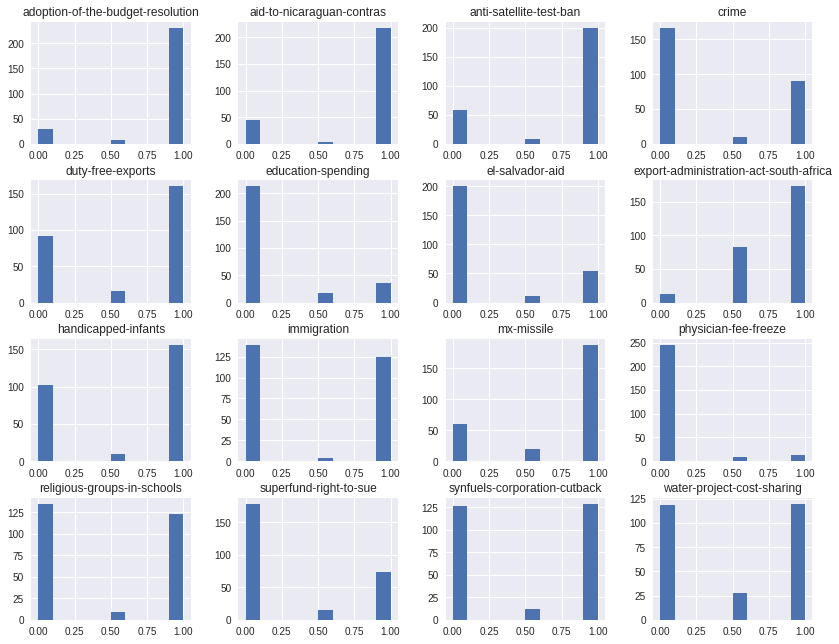

In [74]:
# Histogram - Democrats
data_dem.hist(figsize=(14,11));

In [45]:
for col in cols[1:]:
    stat, pvalue = stats.ttest_ind(data_dem[col], data_rep[col], equal_var=False, nan_policy='omit')
    print(col, stat, pvalue)

handicapped-infants 9.67008151827363 4.8080980501440723e-20
water-project-cost-sharing -0.08778459765765984 0.9300971167247929
adoption-of-the-budget-resolution 22.431686891320805 1.0895246138863937e-68
physician-fee-freeze -52.32559778411112 4.57016051455381e-187
el-salvador-aid -23.66068387360655 1.3486919647068038e-79
religious-groups-in-schools -10.86488426868629 1.7672917900102878e-24
anti-satellite-test-ban 12.398779465196766 1.6115605826873661e-29
aid-to-nicaraguan-contras 17.98258989268033 2.5896445402812338e-52
mx-missile 17.320447917365215 5.2894740521711307e-51
immigration -1.737116567834208 0.08323044617307919
synfuels-corporation-cutback 8.878515411520276 1.869272065956433e-17
education-spending -19.92627187858529 2.4335290533740925e-60
superfund-right-to-sue -14.08658170436922 4.46641950973941e-37
crime -19.275133905034657 2.756616802364248e-57
duty-free-exports 13.92717108382657 1.0776202974716244e-36
export-administration-act-south-africa 4.252320958474351 2.97374527191

In [43]:
scipy.stats.ttest_ind(data_rep.iloc[:,1:], data_dem.iloc[:,1:])

Ttest_indResult(statistic=array([ -9.22317772,   0.0876456 , -22.82169304,  46.10191007,
        20.89561712,   9.81587626, -12.4485563 , -17.79184842,
       -16.32654022,   1.73501664,  -8.2007117 ,  19.74462398,
        13.33312969,  16.09453858, -12.62478284,  -4.67562058]), pvalue=array([1.27611694e-018, 9.30198877e-001, 2.87211531e-076, 3.96714113e-169,
       1.46596592e-067, 1.14299941e-020, 1.27362959e-030, 1.49480148e-053,
       4.86326727e-047, 8.34493972e-002, 2.74340372e-015, 2.38362849e-062,
       3.20480018e-034, 5.09559045e-046, 2.49276711e-031, 3.92129260e-006]))

### Q1: Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [80]:
data_dem['aid-to-nicaraguan-contras'].describe()

count    267.000000
mean       0.823970
std        0.376602
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: aid-to-nicaraguan-contras, dtype: float64

In [81]:
dem_s_stderr = 0.376602 / np.sqrt(len(data_dem['aid-to-nicaraguan-contras']))
dem_s_mean = 0.823970
dnull_hyp_mean = 0.5

dem_t_stat = (dem_s_mean - dnull_hyp_mean) / dem_s_stderr
print(dem_t_stat)

14.056519664771145


In [97]:
scipy.stats.ttest_1samp(data_dem['adoption-of-the-budget-resolution'], 0.5)

Ttest_1sampResult(statistic=19.475459996476697, pvalue=4.119903926520872e-53)

In [96]:
scipy.stats.ttest_1samp(data_rep['adoption-of-the-budget-resolution'], 0.5)

Ttest_1sampResult(statistic=-13.52208250708696, pvalue=1.2928239686728767e-28)

#### Similar Calculation with `stats.ttest_ind`

In [95]:
scipy.stats.ttest_ind(data_dem['adoption-of-the-budget-resolution'], data_rep['adoption-of-the-budget-resolution'])

Ttest_indResult(statistic=22.821693043884803, pvalue=2.872115314395808e-76)

### Q2: Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [85]:
data_rep['physician-fee-freeze'].describe()

count    168.000000
mean       0.979167
std        0.126611
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: physician-fee-freeze, dtype: float64

In [86]:
s_stderr = 0.126611 / np.sqrt(len(data_rep['physician-fee-freeze']))
s_mean = 0.979167
null_hyp_mean = 0.5

rep_t_stat = (s_mean - null_hyp_mean) / s_stderr
print(rep_t_stat)

49.05351159431644


In [87]:
scipy.stats.ttest_1samp(data_rep['physician-fee-freeze'], 0.5)

Ttest_1sampResult(statistic=49.05333395381435, pvalue=4.2285554236275644e-101)

In [98]:
scipy.stats.ttest_1samp(data_dem['physician-fee-freeze'], 0.5)

Ttest_1sampResult(statistic=-29.980179622756864, pvalue=2.768081946704667e-87)

#### Similar Calculation with `stats.ttest_ind`

In [94]:
stats.ttest_ind(data_rep['physician-fee-freeze'], data_dem['physician-fee-freeze'])

Ttest_indResult(statistic=46.10191006844654, pvalue=3.967141133302638e-169)

### Q3: Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [91]:
scipy.stats.ttest_1samp(data_rep['water-project-cost-sharing'], 0.5)

Ttest_1sampResult(statistic=0.1639221603630366, pvalue=0.8699906420050051)

In [92]:
scipy.stats.ttest_1samp(data_dem['water-project-cost-sharing'], 0.5)

Ttest_1sampResult(statistic=0.06456388273583909, pvalue=0.9485697356183774)

#### Similar Calculation with `stats.ttest_ind`

In [99]:
stats.ttest_ind(data_rep['water-project-cost-sharing'], data_dem['water-project-cost-sharing'])

Ttest_indResult(statistic=0.08764559884421878, pvalue=0.9301988772663682)

## Stretch Goals

### 1. Refactor your code into functions so it's easy to rerun with arbitrary variables

In [0]:
def ttesting(data):
    scipy.stats.ttest_1samp(data, 0.5)

### 2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)